<a href="https://colab.research.google.com/github/tortas/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [0]:
import numpy as np
import matplotlib.pyplot as plt

(-1, 3)

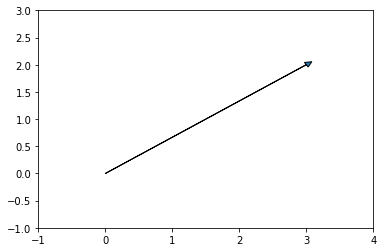

In [5]:
plt.arrow(0,0,3,2,head_width=.1, head_length=.1)
plt.xlim(-1,4)
plt.ylim(-1,3)

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [6]:
np.linalg.norm([-17,-4,-2,1]) #The norm represents its 'length'

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [8]:
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])
np.dot(c,d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [13]:
E = np.array([[7,4,2],
              [1,3,-1],
              [2,6,-4]])
print(E.T)
print(np.linalg.inv(E))

[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]
[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [14]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [15]:
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [18]:
df.var(axis=0)

customers    98761.904762
snow             8.571429
dtype: float64

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [19]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [20]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [30]:
from sklearn.preprocessing import scale

X = df.drop(columns='Country').values

X = scale(X)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


dtype('float64')

In [35]:
print(X.mean())
print(X.std())

3.2653618371328133e-18
1.0


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [44]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(X)

pca_data = pd.DataFrame(data=pca.components_.T)
pca_data.head()

,0,1
0,-0.245721,0.247080
1,0.285629,-0.077170
2,-0.264811,0.136107
3,-0.286118,-0.011006
4,-0.127195,-0.400545


In [48]:
pca_data[0]

0    -0.245721
1     0.285629
2    -0.264811
3    -0.286118
4    -0.127195
5    -0.281101
6     0.097759
7    -0.265450
8    -0.287086
9    -0.120738
10   -0.257678
11   -0.278905
12   -0.178440
13   -0.277475
14    0.227720
15   -0.255095
16   -0.252758
Name: 0, dtype: float64

(-1, 1)

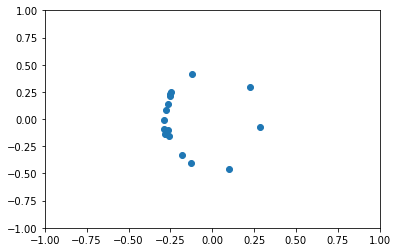

In [53]:
plt.scatter(pca_data[0],pca_data[1])
plt.xlim(-1,1)
plt.ylim(-1,1)

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [62]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


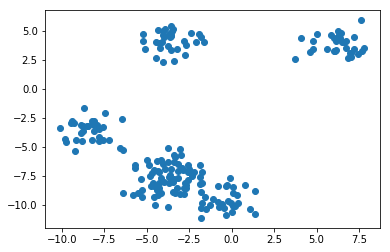

In [70]:
plt.scatter(points.x,points.y)

In [0]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1,6)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

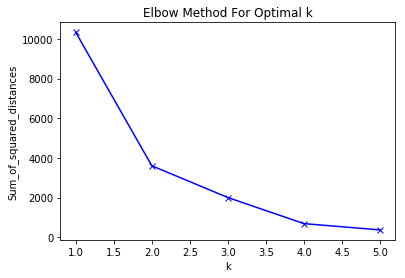

In [68]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
km4 = KMeans(n_clusters=4)
km4 = km.fit(points)
labels = pd.DataFrame(data=km4.labels_, columns=['label'])


In [75]:
labels.head()

,label
0,0
1,4
2,2
3,0
4,2


In [0]:
with_labels = pd.concat([points,labels], axis=1)

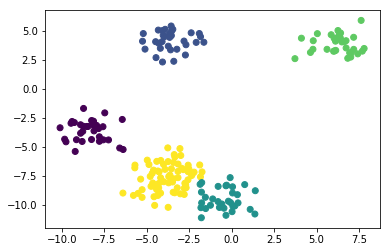

In [80]:
plt.scatter(with_labels.x, with_labels.y, c=with_labels.label)